# La mejor forma de instalar Tensorflow GPU + Tensorboard

- https://www.pugetsystems.com/labs/hpc/The-Best-Way-to-Install-TensorFlow-with-GPU-Support-on-Windows-10-Without-Installing-CUDA-1187/
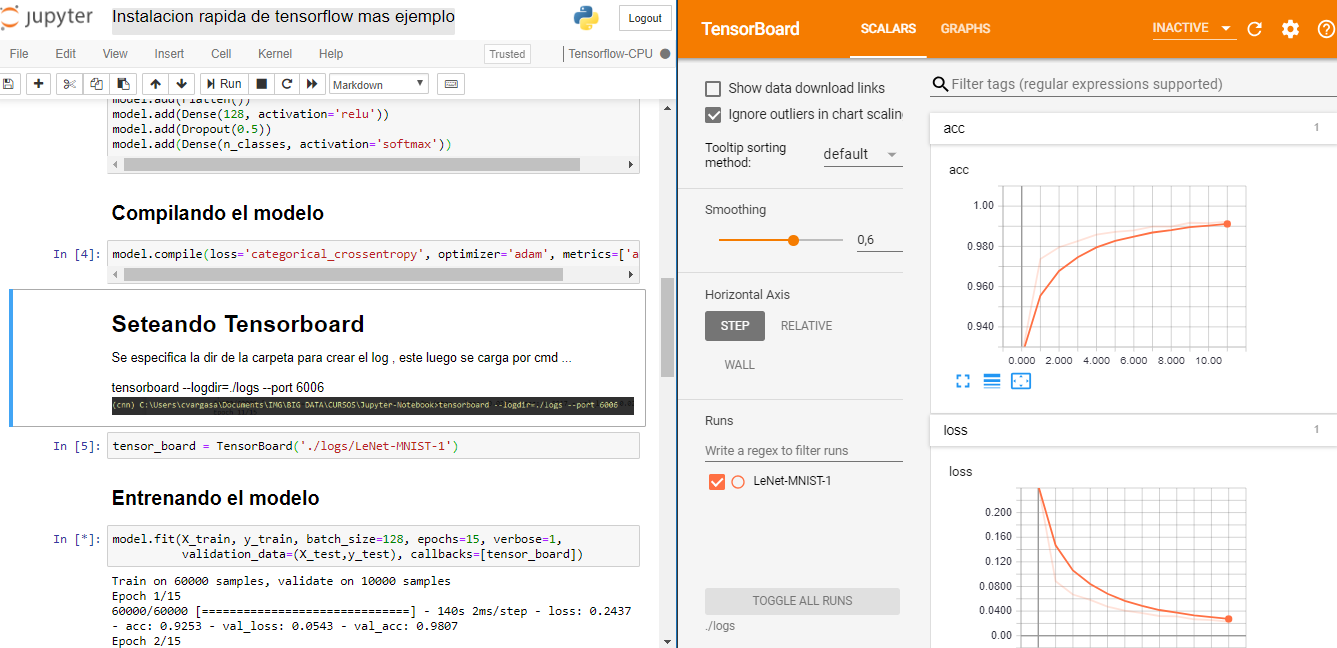

Agregar el kernel a jupyter directo desde anaconda.

```
    python -m ipykernel install --user --name tf-gpu --display-name "TensorFlow-GPU"
```

# Ejemplo con MNIST

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten,  MaxPooling2D, Conv2D
from keras.callbacks import TensorBoard

Using TensorFlow backend.


## Load and process the MNIST data

In [2]:
(X_train,y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test = X_test.reshape(10000,28,28,1).astype('float32')

X_train /= 255
X_test /= 255

n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

11493376/11490434 [==============================] - 10s 1us/step


## Create the LeNet-5 neural network architecture

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)) )
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())          
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

## Compilando el modelo

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Seteando Tensorboard
Se especifica la dir de la carpeta para crear el log  , este luego se  carga por cmd  ...

tensorboard --logdir=./logs --port 6006



In [5]:
tensor_board = TensorBoard('./logs/LeNet-MNIST-1')

## Entrenando el modelo

In [6]:
model.fit(X_train, y_train, batch_size=128, epochs=15, verbose=1,
          validation_data=(X_test,y_test), callbacks=[tensor_board])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 140s 2ms/step - loss: 0.2437 - acc: 0.9253 - val_loss: 0.0543 - val_acc: 0.9807
Epoch 2/15
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0887 - acc: 0.9737 - val_loss: 0.0384 - val_acc: 0.9873
Epoch 3/15
60000/60000 [==============================] - 147s 2ms/step - loss: 0.0670 - acc: 0.9796 - val_loss: 0.0392 - val_acc: 0.9855
Epoch 4/15
60000/60000 [==============================] - 152s 3ms/step - loss: 0.0582 - acc: 0.9826 - val_loss: 0.0338 - val_acc: 0.9889
Epoch 5/15
60000/60000 [==============================] - 150s 2ms/step - loss: 0.0472 - acc: 0.9858 - val_loss: 0.0281 - val_acc: 0.9912
Epoch 6/15
60000/60000 [==============================] - 146s 2ms/step - loss: 0.0406 - acc: 0.9872 - val_loss: 0.0288 - val_acc: 0.9911
Epoch 7/15
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0368 - acc: 0.9880 - val_loss: 0.0310 - 

## Solucion de problemas 

- Si no se inicia la consola de tensorboard por el problema de No module named pkg_resources reinstalar la version de setuptools
- Luego probar con localhost:6006

## Tensorboard
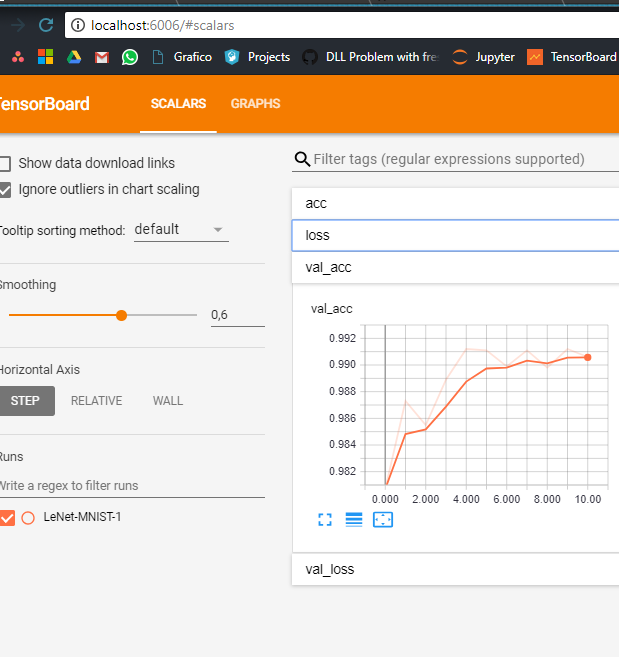

##### That was a model with 1.2 million training parameters and a dataset with 60,000 images. It took 1 minute and 26 seconds utilizing the NVIDIA GeForce 1070 in my laptop system! For reference it took 26 minutes using all cores at 100% of the Intel 6700HQ CPU in that system. That's an 18 fold speedup on the GPU!
##### Mi equipo es un i5 de 8 nucleos tomo cerca de media hora ajustar el modelo al  0.9923 de precision.